# 02 • Integrate all databases and it´s EDA
This notebook integrates the databases cleaned afte ra first draft of the EDA from the following databases:
1. Food prices
2. Economic data
3. Crimes

## Content
1. Load data
2. Integration
3. EDA
4. Save the data

## 1. Load data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
## To install Altair look the following link
##    https://altair-viz.github.io/getting_started/installation.html
# !pip install altair vega_datasets #<--To install using `pip`
# !conda install -c conda-forge altair vega_datasets #<--To install using `conda`

import altair as alt
# alt.renderers.enable('default')
alt.renderers.enable('mimetype')
# print(alt.renderers.active)

RendererRegistry.enable('mimetype')

In [3]:
# Load food prices
df_food = pd.read_csv("../data/data_food-prices.csv")

# change the dates
df_food['date'] = [datetime.strptime(d, '%Y-%m-%d') for d in df_food['date']]
df_food['date'] = [i.strftime("%Y-%m") for i in df_food.date]
# df_food = df_food.astype({'price':'float'}, inplace=True) #'price' to numeric
# df_food["price"] = pd.to_numeric(df_food["price"], downcast="float")

df_food.drop(columns=["Unnamed: 0"], inplace=True)

# describe the data
df_food.info()
df_food.tail(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7349 entries, 0 to 7348
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      7349 non-null   object 
 1   unit      7349 non-null   object 
 2   category  7349 non-null   object 
 3   price     7349 non-null   float64
 4   currency  7349 non-null   object 
 5   country   7349 non-null   object 
 6   admname   7349 non-null   object 
 7   mktname   7349 non-null   object 
 8   producto  7349 non-null   object 
dtypes: float64(1), object(8)
memory usage: 516.9+ KB


,date,unit,category,price,currency,country,admname,mktname,producto
7347,2019-09,KG,pulses and nuts,173.66,PKR,Pakistan,Sindh,Karachi,Beans(mash)
7348,2019-10,KG,pulses and nuts,178.50,PKR,Pakistan,Sindh,Karachi,Beans(mash)


In [4]:
# Load economic data
df_econ = pd.read_csv("../data/data_economic.csv")

# change the dates
df_econ.rename(columns={"Date":"date"}, inplace=True)
df_econ.drop(columns=["Unnamed: 0"], inplace=True)

# describe the data
df_econ.info()
df_econ.tail(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  225 non-null    object 
 1   CPI                                   225 non-null    float64
 2   CPI: Food and Nonalcoholic Beverages  171 non-null    float64
 3   inflat_m_gral                         224 non-null    float64
 4   inflat_a_gral                         213 non-null    float64
 5   inflat_m_food                         170 non-null    float64
 6   inflat_a_food                         159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.4+ KB


,date,CPI,CPI: Food and Nonalcoholic Beverages,inflat_m_gral,inflat_a_gral,inflat_m_food,inflat_a_food
223,2022-08,187.84,197.81,0.024489,0.272543,0.013008,0.295331
224,2022-09,185.68,209.21,-0.011499,0.231790,0.057631,0.317029


In [5]:
# Load crime data
df_crime = pd.read_csv("../data/data_crimes-terrorism.csv")

# change the dates
# df_crime.rename(columns={"Date":"date"}, inplace=True)
df_crime['date'] = [datetime.strptime(d, '%Y-%m-%d') for d in df_crime['date']]
df_crime['date'] = [i.strftime("%Y-%m") for i in df_crime.date]
df_crime.drop(columns=["Unnamed: 0"], inplace=True)

# agregate info by month-year
df_crime = pd.pivot_table(df_crime, index=['date','Country','Province','Region','city','latitude','longitude','AttackType','Target','Group','Target_type','Weapon_type'],
                          values=['Killed','Wounded',"Casualties"],
                          aggfunc=np.sum, fill_value=0).reset_index()

# describe the data
df_crime.info()
df_crime.tail(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1820 non-null   object 
 1   Country      1820 non-null   object 
 2   Province     1820 non-null   object 
 3   Region       1820 non-null   object 
 4   city         1820 non-null   object 
 5   latitude     1820 non-null   float64
 6   longitude    1820 non-null   float64
 7   AttackType   1820 non-null   object 
 8   Target       1820 non-null   object 
 9   Group        1820 non-null   object 
 10  Target_type  1820 non-null   object 
 11  Weapon_type  1820 non-null   object 
 12  Casualties   1820 non-null   int64  
 13  Killed       1820 non-null   int64  
 14  Wounded      1820 non-null   int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 213.4+ KB


,date,Country,Province,Region,city,latitude,longitude,AttackType,Target,Group,Target_type,Weapon_type,Casualties,Killed,Wounded
1818,2017-12,Pakistan,Balochistan,South Asia,Quetta,30.200819,66.994354,Bombing/Explosion,Church,Khorasan Chapter of the Islamic State,Religious Figures/Institutions,Explosives,67,11,56
1819,2017-12,Pakistan,Khyber Pakhtunkhwa,South Asia,Peshawar,34.006004,71.537430,Bombing/Explosion,Dormitory,Tehrik-i-Taliban Pakistan (TTP),Educational Institution,Explosives,49,12,37


## 2. Integration

In [6]:
aux = pd.merge(df_food, df_econ, on=["date"], how="inner")
df = pd.merge(aux, df_crime, on=["date"], how="inner")
df.tail(3)

,date,unit,category,price,currency,country,admname,mktname,producto,CPI,...,latitude,longitude,AttackType,Target,Group,Target_type,Weapon_type,Casualties,Killed,Wounded
46555,2017-12,KG,pulses and nuts,116.58,PKR,Pakistan,Sindh,Karachi,Lentils (moong),109.9,...,34.006004,71.537430,Bombing/Explosion,Dormitory,Tehrik-i-Taliban Pakistan (TTP),Educational Institution,Explosives,49,12,37
46556,2017-12,KG,pulses and nuts,126.92,PKR,Pakistan,Sindh,Karachi,Beans(mash),109.9,...,30.200819,66.994354,Bombing/Explosion,Church,Khorasan Chapter of the Islamic State,Religious Figures/Institutions,Explosives,67,11,56
46557,2017-12,KG,pulses and nuts,126.92,PKR,Pakistan,Sindh,Karachi,Beans(mash),109.9,...,34.006004,71.537430,Bombing/Explosion,Dormitory,Tehrik-i-Taliban Pakistan (TTP),Educational Institution,Explosives,49,12,37


## 3. EDA
### Describe the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46558 entries, 0 to 46557
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  46558 non-null  object 
 1   unit                                  46558 non-null  object 
 2   category                              46558 non-null  object 
 3   price                                 46558 non-null  float64
 4   currency                              46558 non-null  object 
 5   country                               46558 non-null  object 
 6   admname                               46558 non-null  object 
 7   mktname                               46558 non-null  object 
 8   producto                              46558 non-null  object 
 9   CPI                                   46558 non-null  float64
 10  CPI: Food and Nonalcoholic Beverages  41389 non-null  float64
 11  inflat_m_gral  

In [8]:
## Quantitative variables
df.describe()

,price,CPI,CPI: Food and Nonalcoholic Beverages,inflat_m_gral,inflat_a_gral,inflat_m_food,inflat_a_food,latitude,longitude,Casualties,Killed,Wounded
count,46558.000000,46558.000000,41389.000000,46558.000000,46258.000000,41180.000000,38178.000000,46558.000000,46558.000000,46558.000000,46558.000000,46558.000000
mean,75.238851,83.485170,90.319726,0.006093,0.081022,0.004788,0.063941,31.434407,69.405999,18.595064,6.197195,12.397869
std,60.303657,19.362628,14.417250,0.008128,0.047825,0.014980,0.048540,2.955979,2.754896,40.899436,13.460533,29.871106
min,9.000000,33.750000,54.170000,-0.013217,0.013287,-0.036885,-0.010636,24.891115,62.034140,0.000000,0.000000,0.000000
25%,32.700000,71.590000,85.650000,0.001367,0.045975,-0.005020,0.024463,29.035158,67.339928,2.000000,0.000000,0.000000
50%,50.000000,90.860000,95.990000,0.005073,0.076821,0.004579,0.062290,32.588600,70.277379,6.000000,2.000000,3.000000
75%,97.040000,97.840000,100.620000,0.011525,0.097500,0.015429,0.093084,33.976307,71.458679,16.000000,6.000000,10.000000
max,301.430000,110.000000,108.340000,0.033365,0.248386,0.052655,0.218261,35.918091,74.531856,430.000000,158.000000,351.000000


In [9]:
# Unique terms per variable (per column)
pd.DataFrame(df.nunique()).reset_index().rename(columns={'index':'Column name', 0:'Unique terms'})

,Column name,Unique terms
0,date,164
1,unit,3
2,category,7
3,price,2353
4,currency,1
5,country,1
6,admname,4
7,mktname,5
8,producto,16
9,CPI,163


### Missing values

In [10]:
# Look for missing values
df.isnull().sum()

date                                       0
unit                                       0
category                                   0
price                                      0
currency                                   0
country                                    0
admname                                    0
mktname                                    0
producto                                   0
CPI                                        0
CPI: Food and Nonalcoholic Beverages    5169
inflat_m_gral                              0
inflat_a_gral                            300
inflat_m_food                           5378
inflat_a_food                           8380
Country                                    0
Province                                   0
Region                                     0
city                                       0
latitude                                   0
longitude                                  0
AttackType                                 0
Target    

### Analysis and Visualization
#### Price vs. CPI

In [11]:
df.head(3)

,date,unit,category,price,currency,country,admname,mktname,producto,CPI,...,latitude,longitude,AttackType,Target,Group,Target_type,Weapon_type,Casualties,Killed,Wounded
0,2004-02,KG,cereals and tubers,13.0000,PKR,Pakistan,Balochistan,Quetta,Wheat flour,33.75,...,35.918091,74.289803,Bombing/Explosion,Shi'i Muslims in a Shi'i mosque in northern Pa...,Undefined,Religious Figures/Institutions,Explosives,5,0,5
1,2004-02,KG,cereals and tubers,20.0000,PKR,Pakistan,Balochistan,Quetta,"Rice (basmati, broken)",33.75,...,35.918091,74.289803,Bombing/Explosion,Shi'i Muslims in a Shi'i mosque in northern Pa...,Undefined,Religious Figures/Institutions,Explosives,5,0,5
2,2004-02,KG,cereals and tubers,12.2075,PKR,Pakistan,Khyber Pakhtunkhwa,Peshawar,Wheat flour,33.75,...,35.918091,74.289803,Bombing/Explosion,Shi'i Muslims in a Shi'i mosque in northern Pa...,Undefined,Religious Figures/Institutions,Explosives,5,0,5


In [12]:
source = pd.pivot_table(df, index=['date','category'], values=['price','CPI'], aggfunc=np.mean, fill_value=0).reset_index()
source.head()

,date,category,CPI,price
0,2004-02,cereals and tubers,33.75,15.77900
1,2004-03,cereals and tubers,34.10,16.05400
2,2004-04,cereals and tubers,34.42,15.70950
3,2004-05,cereals and tubers,34.66,16.02350
4,2004-06,cereals and tubers,35.05,15.96375


In [13]:
df.describe()

,price,CPI,CPI: Food and Nonalcoholic Beverages,inflat_m_gral,inflat_a_gral,inflat_m_food,inflat_a_food,latitude,longitude,Casualties,Killed,Wounded
count,46558.000000,46558.000000,41389.000000,46558.000000,46258.000000,41180.000000,38178.000000,46558.000000,46558.000000,46558.000000,46558.000000,46558.000000
mean,75.238851,83.485170,90.319726,0.006093,0.081022,0.004788,0.063941,31.434407,69.405999,18.595064,6.197195,12.397869
std,60.303657,19.362628,14.417250,0.008128,0.047825,0.014980,0.048540,2.955979,2.754896,40.899436,13.460533,29.871106
min,9.000000,33.750000,54.170000,-0.013217,0.013287,-0.036885,-0.010636,24.891115,62.034140,0.000000,0.000000,0.000000
25%,32.700000,71.590000,85.650000,0.001367,0.045975,-0.005020,0.024463,29.035158,67.339928,2.000000,0.000000,0.000000
50%,50.000000,90.860000,95.990000,0.005073,0.076821,0.004579,0.062290,32.588600,70.277379,6.000000,2.000000,3.000000
75%,97.040000,97.840000,100.620000,0.011525,0.097500,0.015429,0.093084,33.976307,71.458679,16.000000,6.000000,10.000000
max,301.430000,110.000000,108.340000,0.033365,0.248386,0.052655,0.218261,35.918091,74.531856,430.000000,158.000000,351.000000


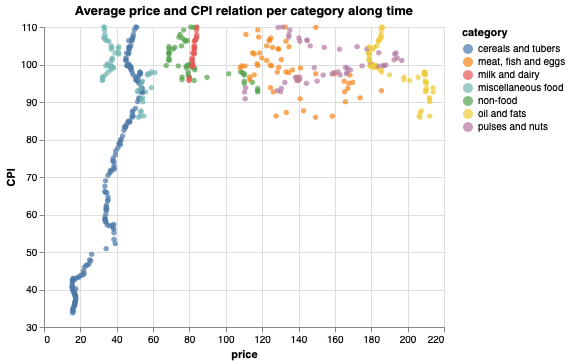

In [16]:
alt.Chart(source).mark_circle().encode(
    alt.X("price"),
    alt.Y("CPI", scale=alt.Scale(zero=False)),
    alt.Color("category"),
    #alt.Shape("category"),
    tooltip=["date","category","price","CPI"]
).properties(
    title="Average price and CPI relation per category along time"
)

#### Scatter matrix with the interaction of quantitative variables

In [26]:
source = pd.pivot_table(df, index=['date','price', 'CPI','inflat_m_gral','inflat_a_gral','inflat_m_food','inflat_a_food'], values=['Casualties', 'Killed', 'Wounded'], aggfunc=np.sum, fill_value=0).reset_index()
source.tail(4)

,date,price,CPI,inflat_m_gral,inflat_a_gral,inflat_m_food,inflat_a_food,Casualties,Killed,Wounded
4083,2017-12,190.00,109.9,-0.000909,0.05602,-0.006277,0.051675,116,23,93
4084,2017-12,192.00,109.9,-0.000909,0.05602,-0.006277,0.051675,116,23,93
4085,2017-12,194.00,109.9,-0.000909,0.05602,-0.006277,0.051675,116,23,93
4086,2017-12,203.75,109.9,-0.000909,0.05602,-0.006277,0.051675,116,23,93


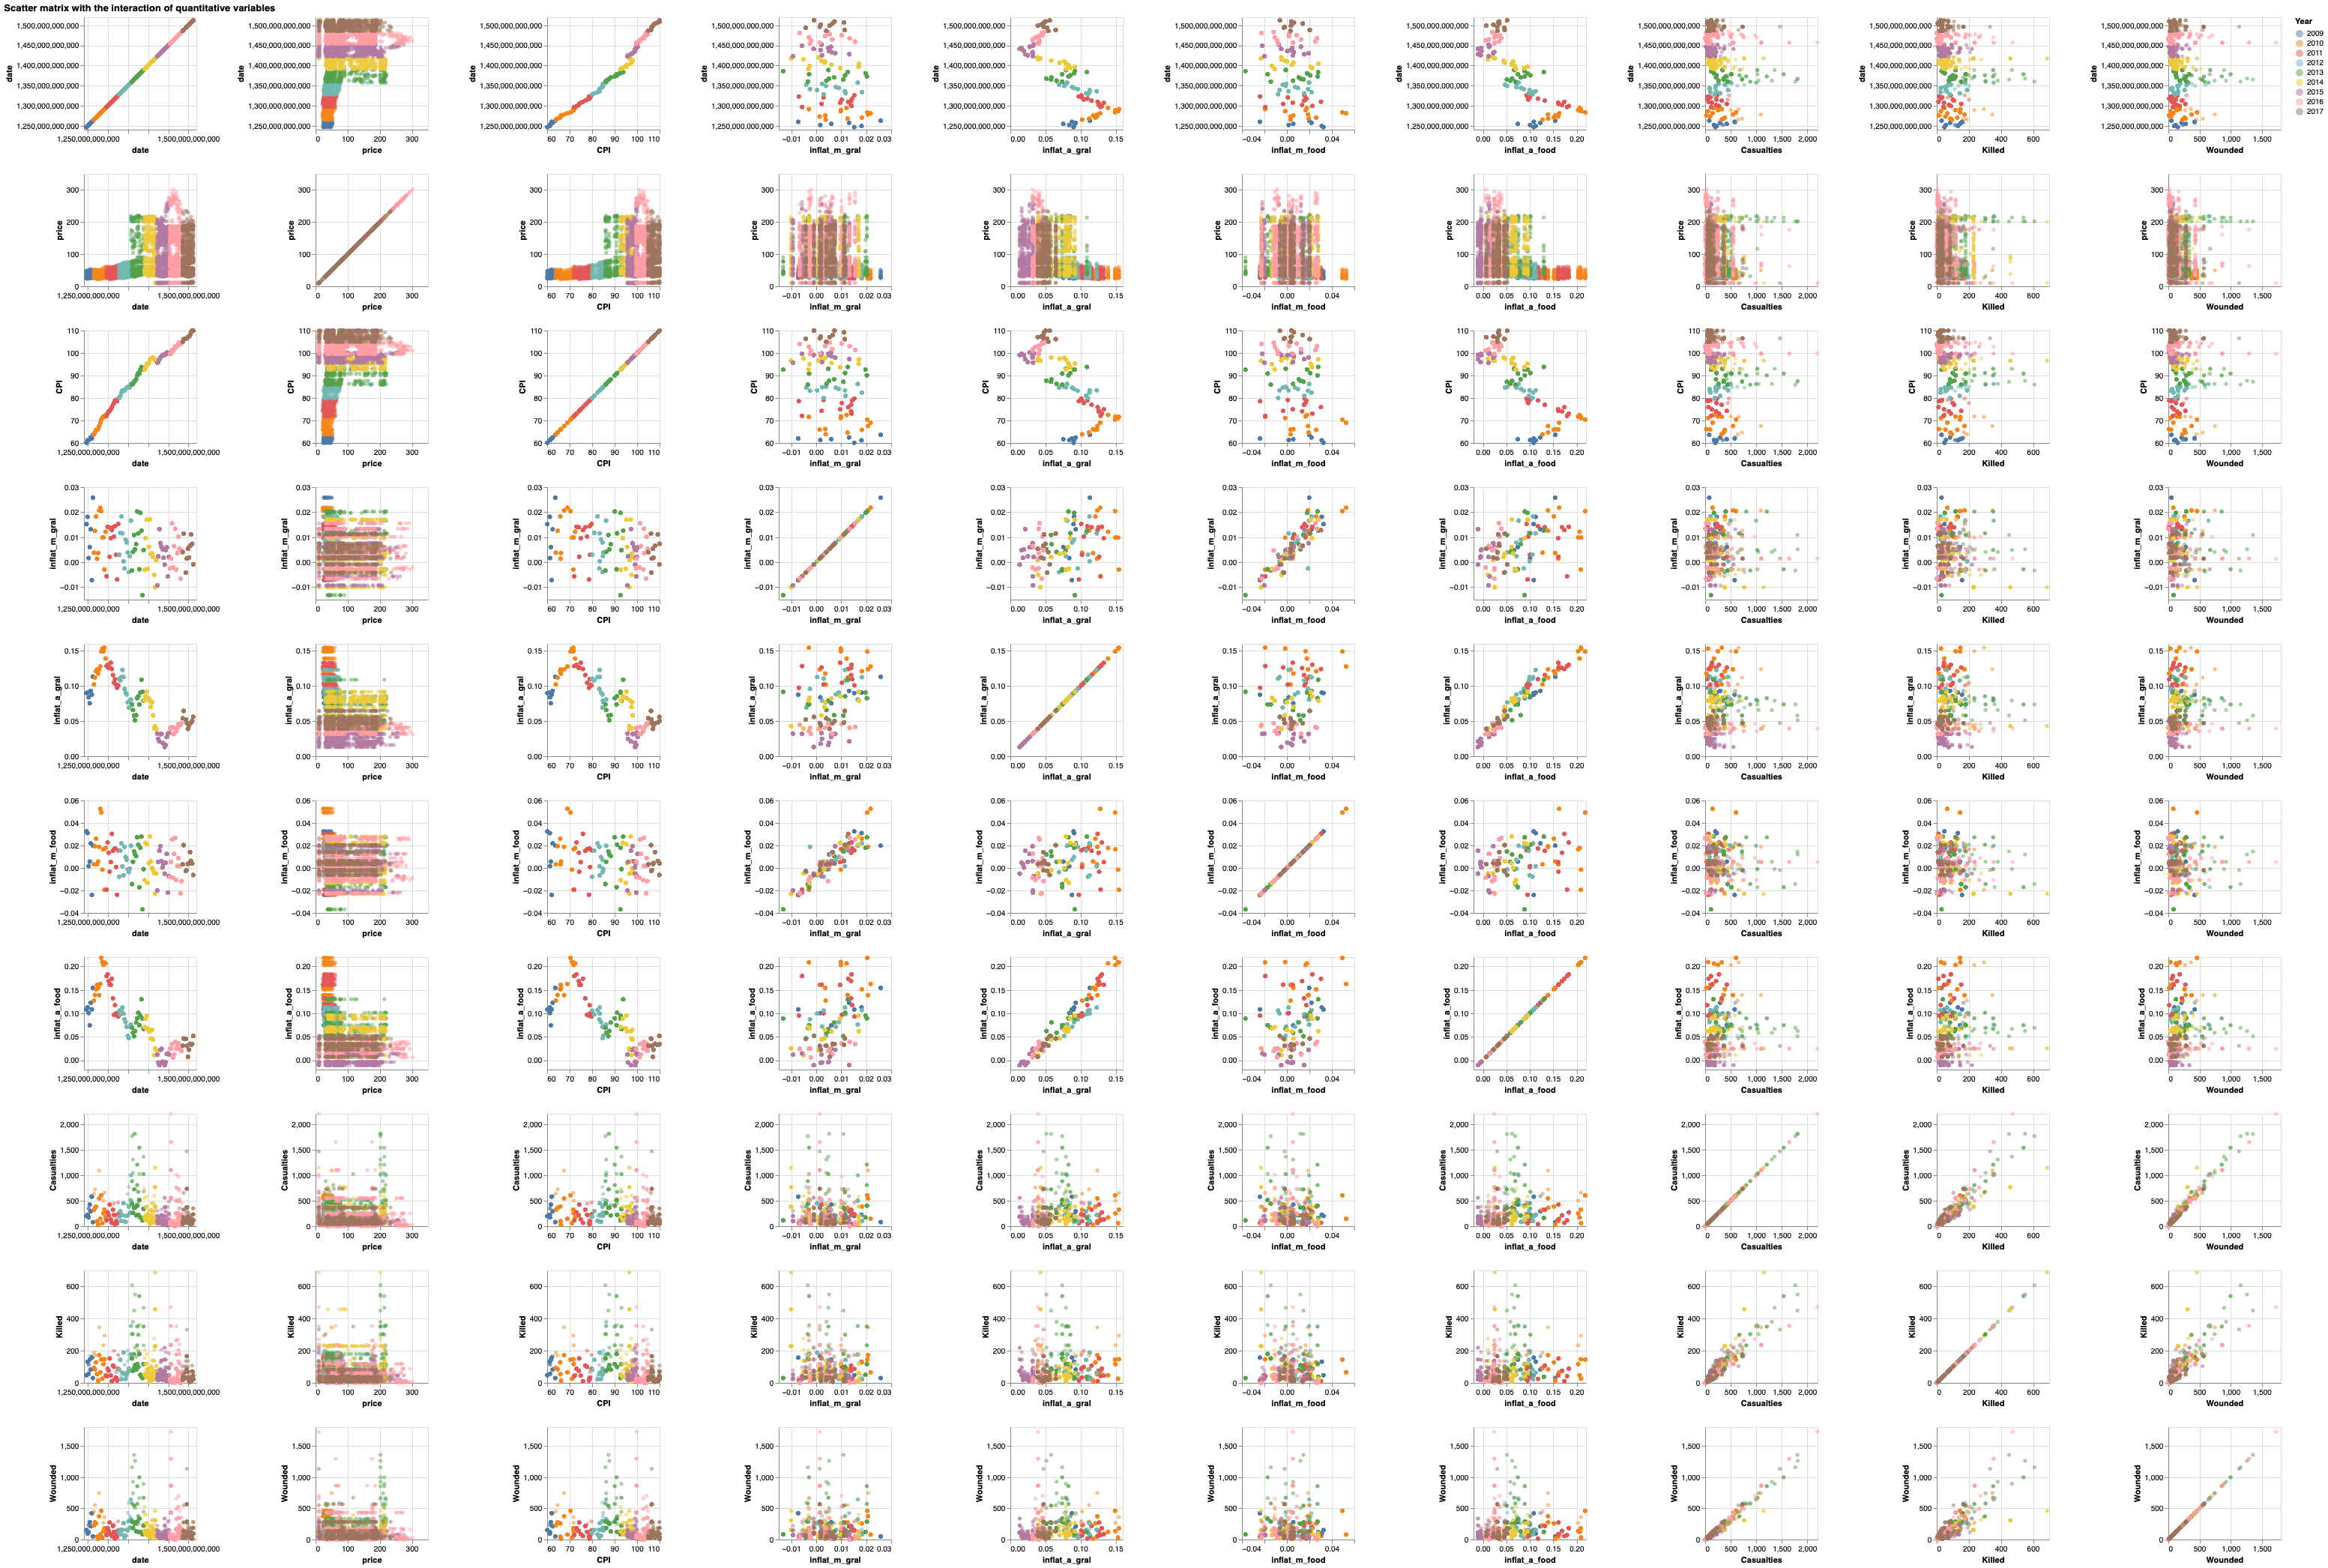

In [31]:
alt.Chart(source).mark_circle(opacity=.5).encode(
    alt.X(alt.repeat("column"), type='quantitative',scale=alt.Scale(zero=False)),
    alt.Y(alt.repeat("row"), type='quantitative',scale=alt.Scale(zero=False)),
    alt.Color('year(date):N',title="Year"),
    tooltip=['year(date)','price','CPI','inflat_m_gral','inflat_a_gral','inflat_m_food','inflat_a_food','Casualties','Killed','Wounded']
).properties(
    width=150, height=150
).repeat(
    row=['date','price','CPI','inflat_m_gral','inflat_a_gral','inflat_m_food','inflat_a_food','Casualties','Killed','Wounded'],
    column=['date','price','CPI','inflat_m_gral','inflat_a_gral','inflat_m_food','inflat_a_food','Casualties', 'Killed', 'Wounded']
).properties(
    title="Scatter matrix with the interaction of quantitative variables"
)#.interactive()

## 4. Save the data

In [33]:
# save the data
df.to_csv('../data/data_final.csv')  